**THE SPARK FOUNDATION**

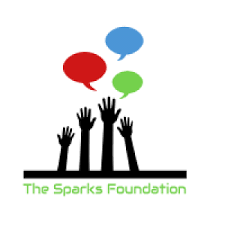

NAME : Vaishali Yadav

BATCH: GRIP-OCT'23

TASK : SAMPLE SUPERSTORE SALES DATA EDA

**SAMPLE SUPER STORE SALES EXPLORATORY Data Analysis(EDA)**
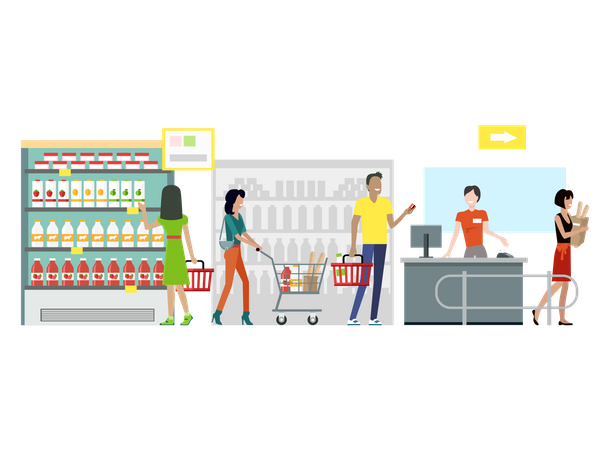


As a Sales Data Analyst the objective behind this project are as follows:



*   To perform Exploratory Data Analysis on dataset:
      1.   Investigation of Data
      2.   Find Missing and duplicates in data and fix them
      3.   summary or description of data
      4.   detect outliers
      5.   Discovering patterns in dataset
      6.   Graphical Representation of data

*   Revenue Analysis .
*   Profit and Discount Analysis
*   Product Performance Analysis



# Libraries

In [74]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#Basic EDA

In [75]:
df = pd.read_csv(r'/content/drive/MyDrive/sales data EDA/SampleSuperstore.csv', encoding='utf-8')
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [76]:
df.shape

(9994, 13)

The Sample superstore Dataset consist of 9994 rows and 13 columns

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [78]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

There are

In [79]:
#summary statistics:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Summary shows we have:

Average sales for store of 229.858001

Average discount on products 0.15

Average profit on sales is 28.65

Now Let us Check for Null and Duplicates in Dataset and fix them

In [80]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

As it is shown no null values in dataset

In [81]:
df.duplicated().sum()

17

As it has small amount of duplicates so i am dropping them

In [82]:
df.drop_duplicates(inplace=True)

In [83]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

Here Postal code is unnecessary column for analysis so it will be good to drop it

In [84]:
# Drop Unnecessary Columns
df.drop('Postal Code',axis=1,inplace=True)

In [85]:
df.shape

(9977, 12)

Yayy! our data is clean now No missing , duplicates in it let's explore features now

#Exploring Features of Dataset

#Product Performance Analysis

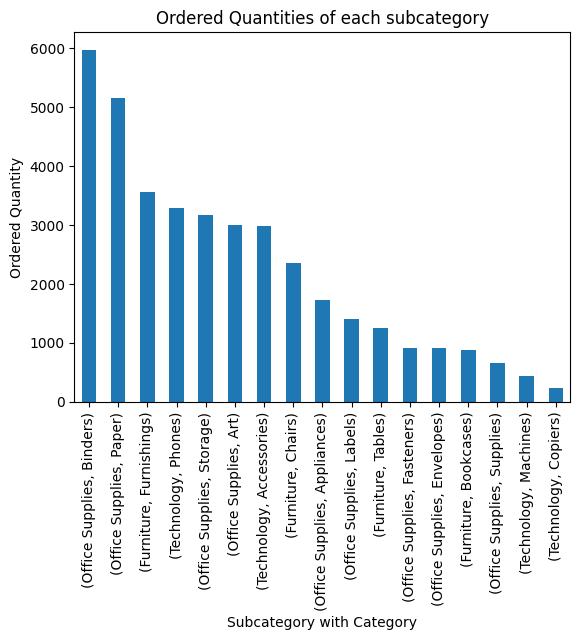

<Figure size 1500x800 with 0 Axes>

In [86]:
#Highest ordered Product
df2=df.groupby(['Category','Sub-Category'])['Quantity'].sum().sort_values(ascending=False)
z=df2.plot(kind='bar',xlabel=('Subcategory with Category'),ylabel=('Ordered Quantity'))
plt.title('Ordered Quantities of each subcategory')
plt.figure(figsize=(15,8))
plt.show()

as graphhical visual shows most ordered product is **binders under office supplies category** as it orderd in quantity of 5961.

In [87]:
df1=df[['Region','Category','Sales']]
pivot=pd.pivot_table(df1, values = 'Sales', index=['Region'], columns = 'Category').reset_index()
pivot.set_index('Region',inplace=True)
pivot

Category,Furniture,Office Supplies,Technology
Region,,,
Central,340.431654,117.659864,405.753124
East,346.683053,120.147008,495.278469
South,353.309289,126.282727,507.753952
West,357.777059,116.881992,420.687533


In [88]:
df1.Region.value_counts().index

Index(['West', 'East', 'Central', 'South'], dtype='object')

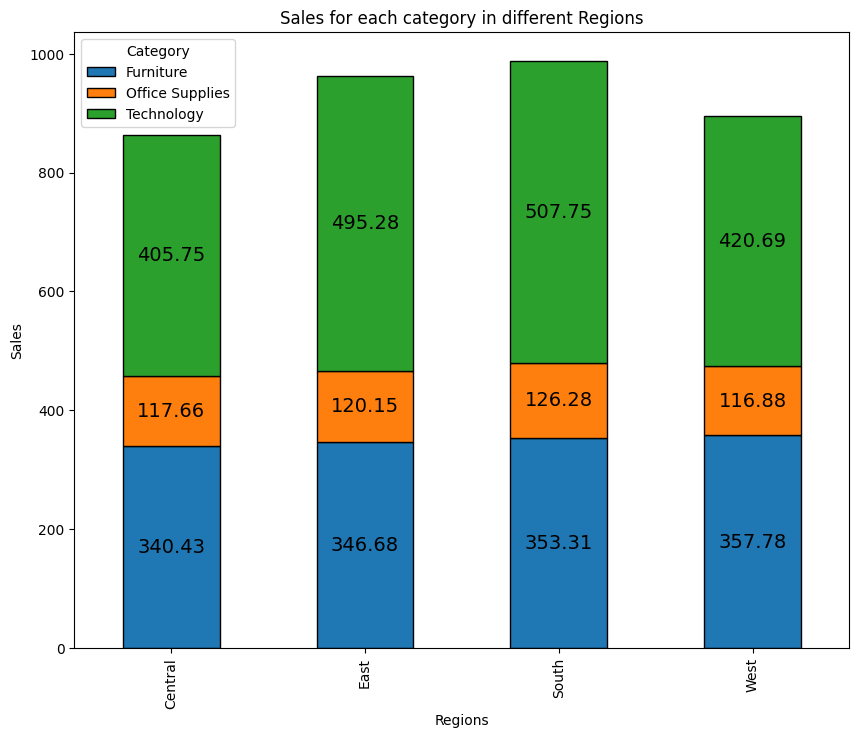

In [89]:
_,ax = plt.subplots(figsize=(10, 8))
pivot.plot(kind="bar", stacked=True, ax=ax , xlabel='Regions',ylabel='Sales',width = 0.5,
        edgecolor = "black",title ='Sales for each category in different Regions')
for c in ax.containers:
    labels=([round(v.get_height(), 2) if v.get_height() > 0 else '' for v in c])
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 14)

The Category **Technology** having highest sales in all reigons

#Sales,profit/loss,Discount Analysis w.r.t. different features

In [90]:
# shipMode: It is basically mode of shipment of products.
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

In [91]:
data=df.groupby('Ship Mode')['Sales'].sum().values
labels=df.groupby('Ship Mode')['Sales'].sum().index

Text(0.5, 1.0, 'Most Profitable Ship Mode')

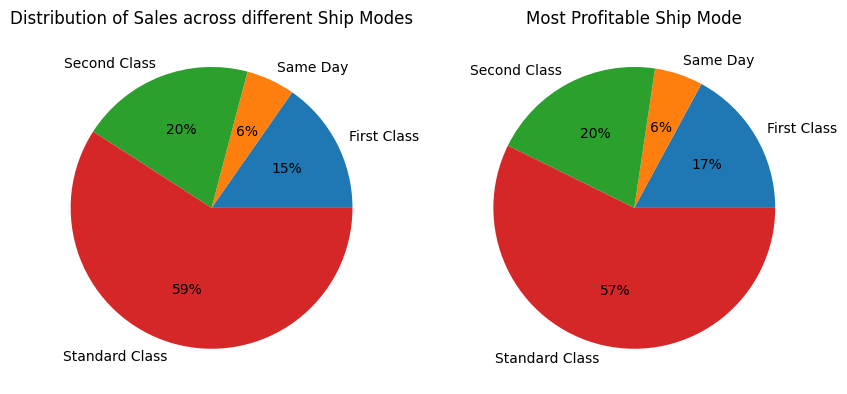

In [92]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.pie(df.groupby('Ship Mode')['Sales'].sum().values, labels=df.groupby('Ship Mode')['Sales'].sum().index,autopct='%.0f%%')
ax1.set_title('Distribution of Sales across different Ship Modes')

ax2.pie(df.groupby('Ship Mode')['Profit'].sum().values, labels=df.groupby('Ship Mode')['Profit'].sum().index,autopct='%.0f%%')
ax2.set_title('Most Profitable Ship Mode')

As This pie chart shows standard class ship mode is giving high sales and profit for store

In [93]:
# Now Let's Check or sales and profit based on segment which are classified as consumer , corporate, home or office.

In [94]:
new_df=df.groupby('Segment')[['Sales','Profit']].sum()
new_df.index

Index(['Consumer', 'Corporate', 'Home Office'], dtype='object', name='Segment')

Text(0.5, 1.0, 'Profit by Segment')

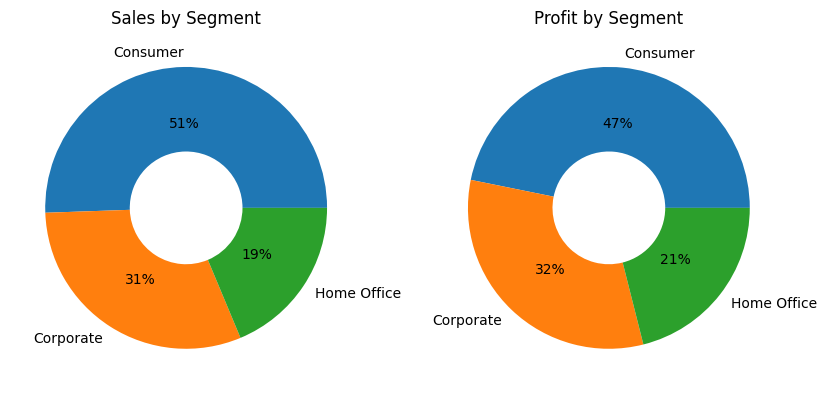

In [95]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.pie(x=new_df['Sales'].values,wedgeprops=dict(width=.6), labels=new_df.index,autopct='%.0f%%')
ax1.set_title('Sales by Segment')

ax2.pie(x=new_df['Profit'].values,wedgeprops=dict(width=.6), labels=new_df.index,autopct='%.0f%%')
ax2.set_title('Profit by Segment')

This donught chart representing that consumer segment in store having higher sales and profit

In [96]:
# reigon wise profit margin
data=df.groupby('Region')[['Sales','Profit']].sum()
data['ProfitMargin%']=round((data['Profit']/data['Sales'])*100,2)
data

,Sales,Profit,ProfitMargin%
Region,,,
Central,500782.8528,39655.8752,7.92
East,678435.1960,91506.3092,13.49
South,391721.9050,46749.4303,11.93
West,725255.6365,108329.8079,14.94


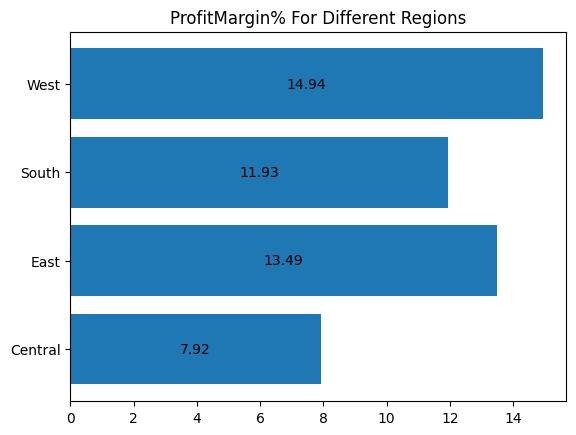

In [97]:
x=plt.barh(y=data.index,width=data['ProfitMargin%'].values)
plt.bar_label(container=x,labels=data['ProfitMargin%'].values,label_type='center',fmt='%g')
plt.title('ProfitMargin% For Different Regions')
plt.show()

Most profitable reigon is west with 14.94%

<Axes: title={'center': 'Profit/loss based on Product'}, ylabel='Category,Sub-Category'>

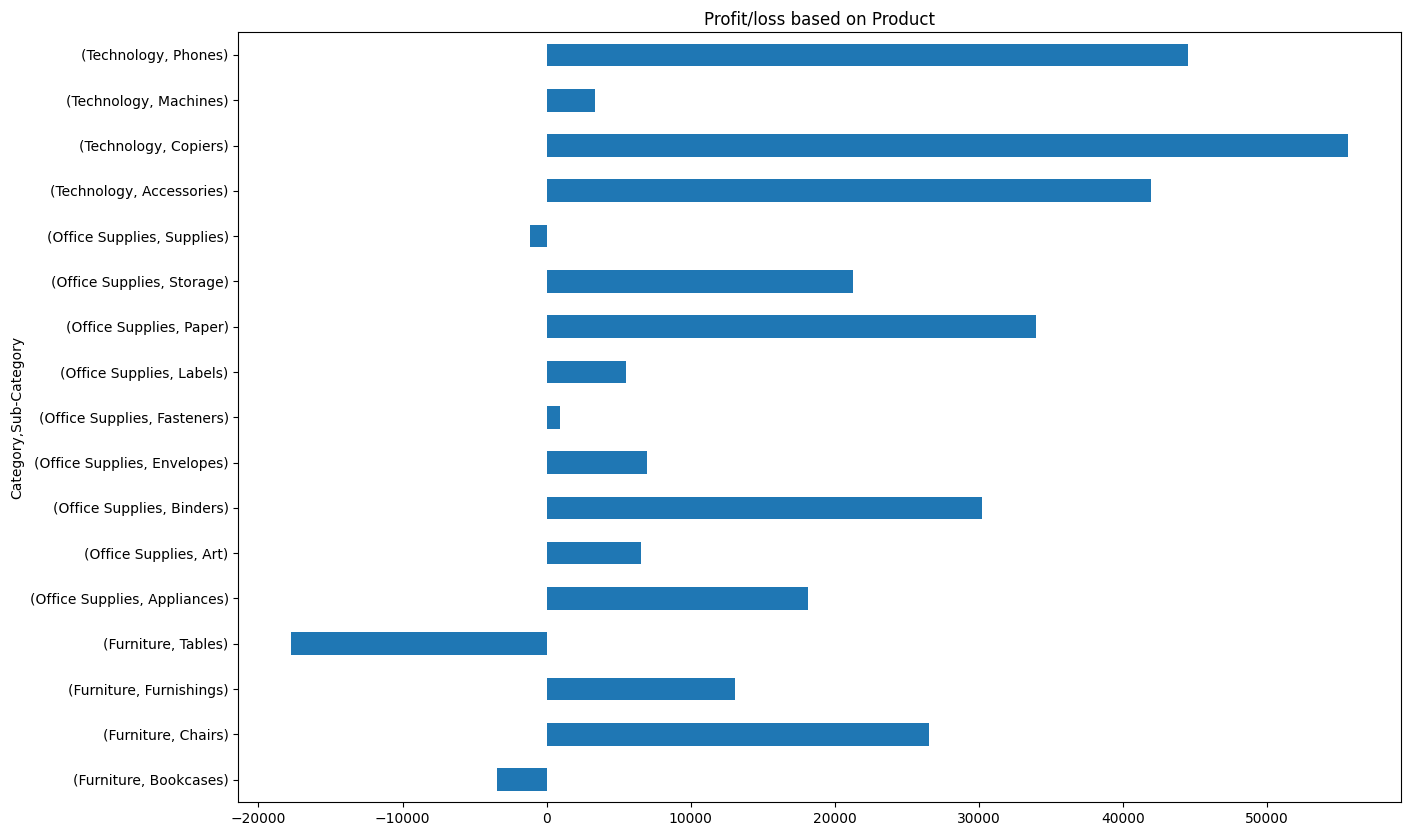

In [98]:
#Profit/loss based on subcategory
df.groupby(['Category','Sub-Category'])['Profit'].sum().plot(kind='barh', figsize=(15,10),title="Profit/loss based on Product")

from this analysis we can see there are few products or subcategories which are having losses and highest loss category is **Tables under Furniture category** and on the other hand highest profit we are getting in **Copiers under Technology category**

#Revenue Analysis

In [99]:
df.groupby(['Region'])[['Sales']].sum().values

array([[500782.8528],
       [678435.196 ],
       [391721.905 ],
       [725255.6365]])

In [100]:
df['Region'].value_counts().index

Index(['West', 'East', 'Central', 'South'], dtype='object')

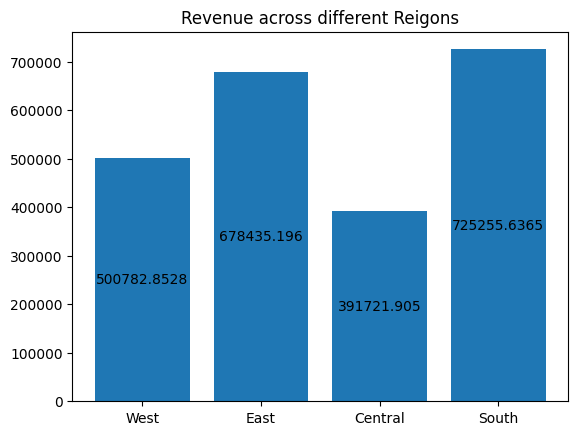

<Figure size 1500x800 with 0 Axes>

In [101]:
p=plt.bar(x=df['Region'].value_counts().index, height=df.groupby(['Region'])['Sales'].sum().values)
plt.bar_label(container=p,labels=df.groupby(['Region'])['Sales'].sum().values,fmt='%g',
    label_type='center')
plt.title('Revenue across different Reigons')
plt.figure(figsize=(15,8))
plt.show()

South reigon has highes revenue with 724309.2935 $.

In [102]:
df.City.value_counts().shape

(531,)

There is 531 cities in which we have our stores

In [103]:
#Top 10 cities with highest Sales
city_sales=df.groupby('City')['Sales'].sum().sort_values()
city_sales

City
Abilene               1.392
Elyria                1.824
Jupiter               2.064
Pensacola             2.214
Ormond Beach          2.808
                    ...    
Philadelphia     109061.461
San Francisco    112577.172
Seattle          119460.282
Los Angeles      175831.901
New York City    256319.041
Name: Sales, Length: 531, dtype: float64

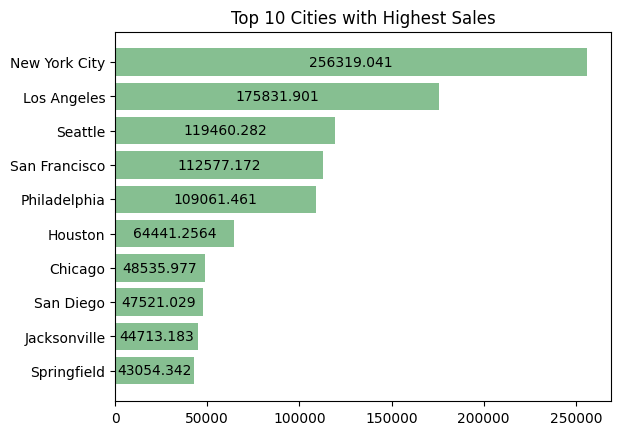

<Figure size 1500x800 with 0 Axes>

In [104]:
#Top 10 Cities with highest sales
Top_10_sales_cities=city_sales.tail(10)
q=plt.barh(y=Top_10_sales_cities.index,width=(Top_10_sales_cities.values),color='#86bf91')
plt.bar_label(container=q,labels=(Top_10_sales_cities.values),label_type='center')
plt.title('Top 10 Cities with Highest Sales')
plt.figure(figsize=(15,8))
plt.show()

**NewYork City** is the city having highest revenue 2.56M $.

In [105]:
profit_loss_df=df.groupby('City')['Profit'].sum()
profit_loss_df

City
Aberdeen          6.6300
Abilene          -3.7584
Akron          -186.6356
Albuquerque     634.0881
Alexandria      318.6183
                 ...    
Woonsocket       78.6791
Yonkers        2767.7557
York           -102.1692
Yucaipa          13.2080
Yuma           -465.9909
Name: Profit, Length: 531, dtype: float64

In [106]:
#we can see above there are some cities which are in loss let's find out those cities
loss_cities=profit_loss_df[profit_loss_df.values<0].index
loss_cities

Index(['Abilene', 'Akron', 'Allen', 'Allentown', 'Altoona', 'Amarillo',
       'Aurora', 'Austin', 'Bethlehem', 'Bloomington',
       ...
       'Tinley Park', 'Toledo', 'Troy', 'Tucson', 'Tyler', 'Waco', 'Wheeling',
       'Wilson', 'York', 'Yuma'],
      dtype='object', name='City', length=116)

In [107]:
list1=[]
for c in loss_cities:
    list1.append(c)

list1 #list of all cities which are in loss i.e.116 cities

['Abilene',
 'Akron',
 'Allen',
 'Allentown',
 'Altoona',
 'Amarillo',
 'Aurora',
 'Austin',
 'Bethlehem',
 'Bloomington',
 'Boca Raton',
 'Bolingbrook',
 'Bryan',
 'Buffalo Grove',
 'Burlington',
 'Carol Stream',
 'Carrollton',
 'Champaign',
 'Charlotte',
 'Chicago',
 'Clarksville',
 'Cleveland',
 'College Station',
 'Colorado Springs',
 'Commerce City',
 'Concord',
 'Corpus Christi',
 'Cuyahoga Falls',
 'Dallas',
 'Daytona Beach',
 'Deer Park',
 'Denver',
 'Des Plaines',
 'Dublin',
 'El Paso',
 'Elmhurst',
 'Elyria',
 'Fort Collins',
 'Fort Lauderdale',
 'Frankfort',
 'Freeport',
 'Frisco',
 'Garland',
 'Gastonia',
 'Grand Prairie',
 'Greensboro',
 'Greenville',
 'Hamilton',
 'Hendersonville',
 'Hialeah',
 'Hickory',
 'Highland Park',
 'Houston',
 'Irving',
 'Jacksonville',
 'Knoxville',
 'Lakeland',
 'Lancaster',
 'Laredo',
 'League City',
 'Littleton',
 'Lorain',
 'Louisville',
 'Mansfield',
 'Marion',
 'Mason',
 'Mcallen',
 'Medina',
 'Memphis',
 'Mentor',
 'Mesa',
 'Mesquite',
 '

Among 531 cities where are our stores located ,116 cities are having losses

Key Insights Found
*   Highest Revenue city NewYork City 2.56M$
*   Highest profitable product Copiers & loss product Tables
*   116 stores are in loss
*   consumer segment is most profitable and has good sales
*   Technology category has highest sales in all reigons
*   South reigon has highest sales





